# Creating the Logistic Regression Model

In [262]:
import numpy as np
import pandas as pd

### Creating Our Essential Functions

In [263]:
# returns the probability a student will "pass the class(1)"
def predict(features, weights, bias):
    
    x = np.dot(features, weights) 
    z = x + bias
    # sigmoid activation function to represent our probabilities:
    return 1 / (1 + np.exp(-z))

def classify(predictions):
    
    df = pd.DataFrame(predictions)
    df[0] = df[0].apply(lambda x: 1 if x >= 0.5 else 0)

    predictions = df.to_numpy()
    
    return predictions
    
def update_weights(features, targets, weights, bias, learning_rate):
    
    N = len(features)
        
    # make predictions
    predictions = predict(features, weights, bias)
        
    # formula for updating weights from the derivative of the cost function with respect to weights:
    # new_weights = original_weights + learning_rate(ytrue - ypred)(input)
    
    # the derivative of the cost function with respect to weights:
    # we also need to transpose the feature matrix so we can use it in multiplication with the other matrix:
    gradient = np.dot(features.T, targets - predictions)
    
    # take the average cost derivative for each feature
    gradient /= N

    # multiply the gradient by our learning rate
    gradient *= learning_rate
   
    # add to our weights to minimize cost
    weights += gradient

    return weights
    
def update_bias(features, targets, weights, bias, learning_rate):
    
    N = len(features)
        
    # we use the same update function as update_weights except we assume input is always 1
    # new_bias = original_bias + learning_rate(ytrue - ypred)(input)
    predictions = predict(features, weights, bias)
    
    # the derivative of the cost function with respect to weights and input of 1:
    gradient = np.dot(learning_rate,  targets - predictions)

    # average cost derivative for each feature:
    gradient /= N

    # add to our bias to minimize cost
    bias += gradient
  
    return bias

# cross entropy cost function:
def cost_function(features, targets, weights, bias):
    
    N = len(features)
    
    predictions = predict(features, weights, bias)
    
    # Error when target=1
    cost1 = -targets*np.log(predictions)

    # Error when target=0
    cost2 = (1-targets)*np.log(1-predictions)

    # Sum of both costs
    cost = cost1 - cost2

    # Average cost
    cost = cost.sum() / N

    return cost

# Keeping track of our loss:
cost_history = []

def train(features, targets, weights, bias, learning_rate, iters):
    
    # using gradient descent because of small dataset:
    for i in range(iters):
        
        weights = update_weights(features, targets, weights, bias, learning_rate)
        bias = update_bias(features, targets, weights, bias, learning_rate)

        #Calculate error for auditing purposes:
        cost = cost_function(features, targets, weights, bias)

        # Keeping track of our loss:
        if i % 100 == 0:
            cost_history.append([i,cost])

    return weights, bias

# Find accuracy of our model:
def accuracy(predicted_labels, actual_labels):
    
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

### Using Our Model
- Here we define our targets and features after cleaning the data and shape the matrices to our desired shape
- We also do the same for our weights and bias

In [264]:
# import the final dataframe from Data_Cleaning script
from ipynb.fs.full.Data_Cleaning import df

# creating targets and features
targets = df['G3'].to_numpy().reshape(395,1)
df = df.drop('G3', axis=1)
features = df.to_numpy() # shape: (395, 23)

In [265]:
# defining our variables:
weights = np.zeros( shape=(23,1) )
bias = np.ones( shape=(197,1) )
learning_rate = 0.01
iters = 5000

# features[:197], targets[:197] will be our training set

# obtain optimal weights and bias:
weights, bias = train(features[:197], targets[:197], weights, bias, learning_rate, iters)

# make predictions:
predictions = predict(features[198:], weights, bias)

# Uncomment to see probability predictions:
# print(predictions)

In [266]:
# finding the model accuracy:

predicted = classify(predictions)
accuracy(predicted, targets[198:])

0.6091370558375635

### Visualizing Our Cross Entropy Loss Function
- We can achieve nearly zero loss if we run enough iters but the problem is that it will be too overfit to the training dataset causing a lower accuracy in predicting newer data

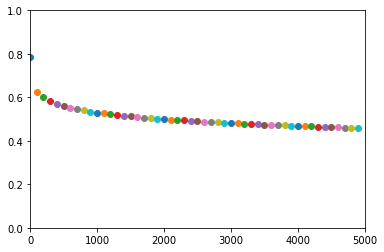

In [267]:
import matplotlib.pyplot as plt

for i in range(len(cost_history)):
    
    plt.ylim((0,1))
    plt.xlim((0,iters))
    plt.scatter(cost_history[i][0], cost_history[i][1])